In [1]:
import anndata
import numpy as np
from plot_distr_xenium import plot_spatial_distribution, InteractivePlot
import matplotlib.pyplot as plt

### 0 - Load anndata object from Xenium bundle folder or from any other file format (like zarr of h5ad)

In [2]:
path_xenium_anndata = '/lustre/scratch127/cellgen/cellgeni/tickets/tic-3602/codes/out/0.5.3/FB_SPI-14dpi-B-anndata.zarr'
adata = anndata.read_zarr(path_xenium_anndata)
adata

AnnData object with n_obs × n_vars = 33346 × 474
    obs: 'cell_id', 'x_centroid_x', 'y_centroid_x', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'x_centroid_y', 'y_centroid_y', 'group'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'xenium'
    obsm: 'X_pca', 'X_spatial', 'X_umap'

### 1 - Define reference (wound) point position using interactive plot and cell positions (please note that cell position may be at different location, like adata.obsm['spatial])

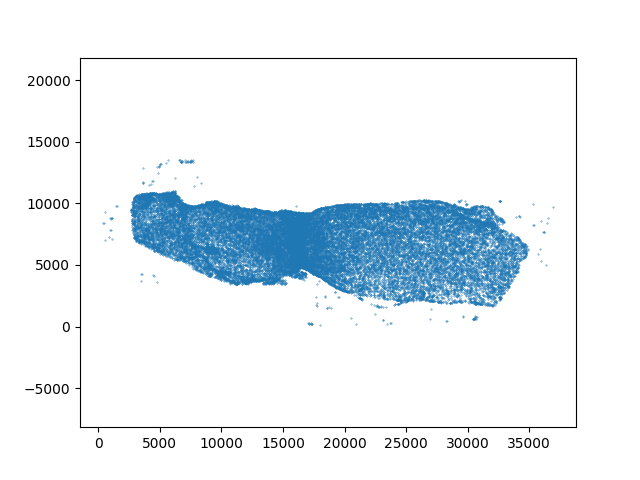

In [3]:
%matplotlib widget

plot = InteractivePlot(adata.obsm['X_spatial'], size = 0.1)

plt.show()


2a - Example of plotting gene expression on separate figures

Tac1


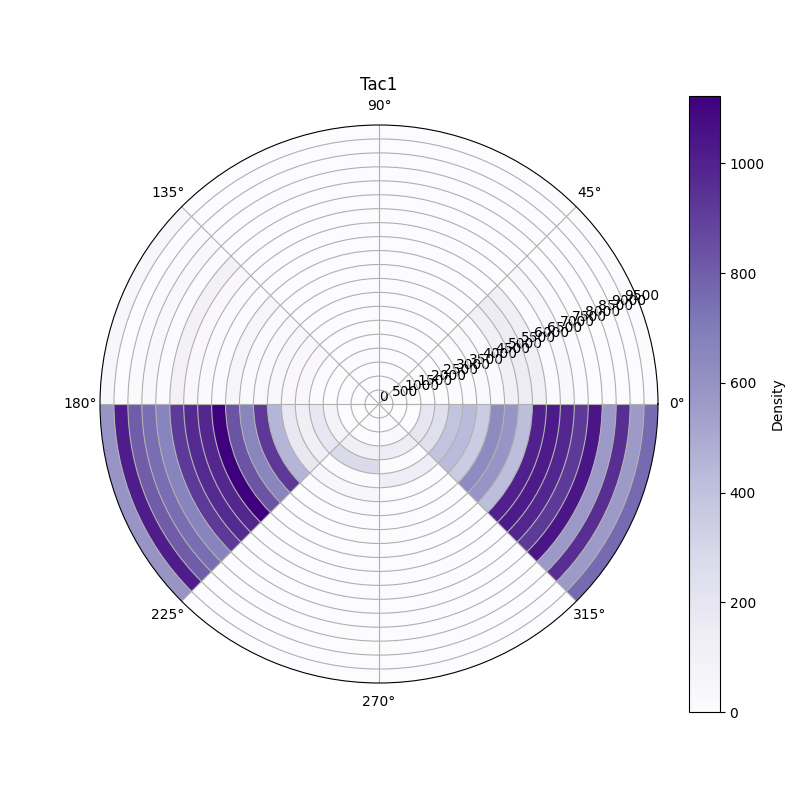

Sst


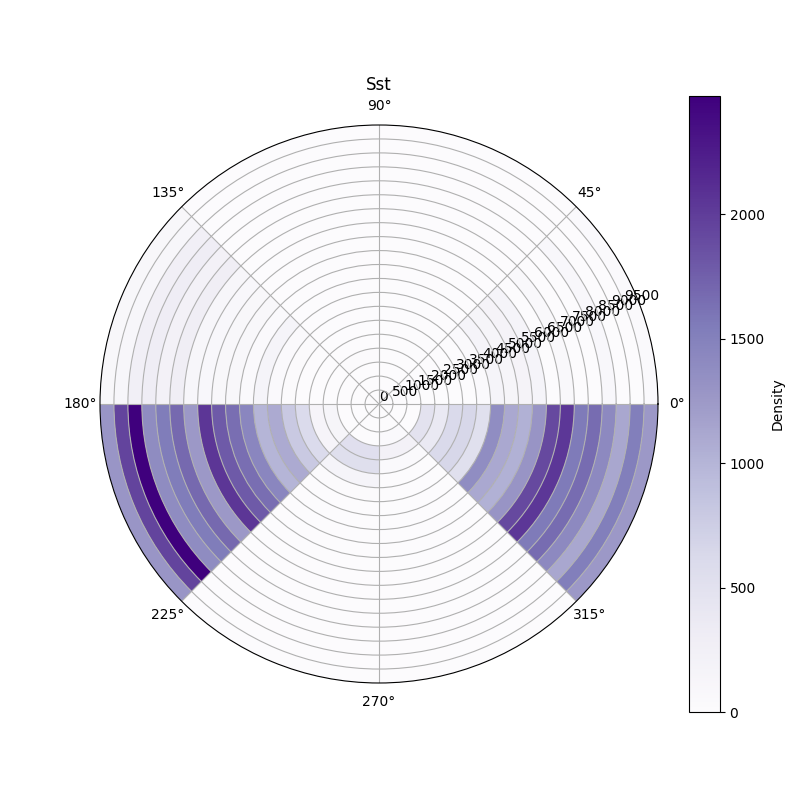

Ifit2


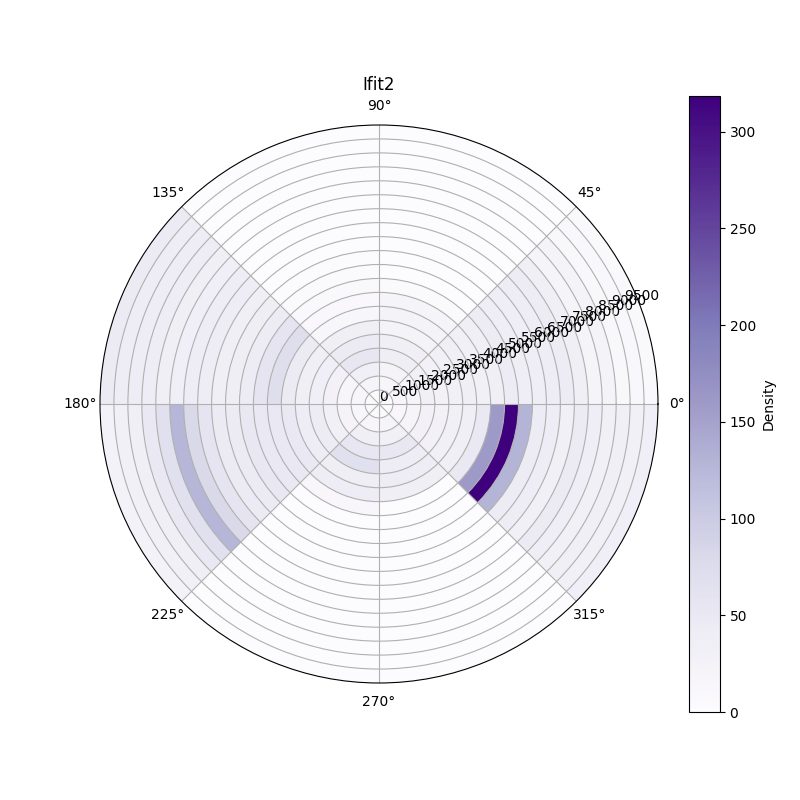

In [4]:
plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out2', gene_list = ['Tac1', 'Sst', 'Ifit2'], distance_bin_size =500,distance_max = 10000)

Tac1


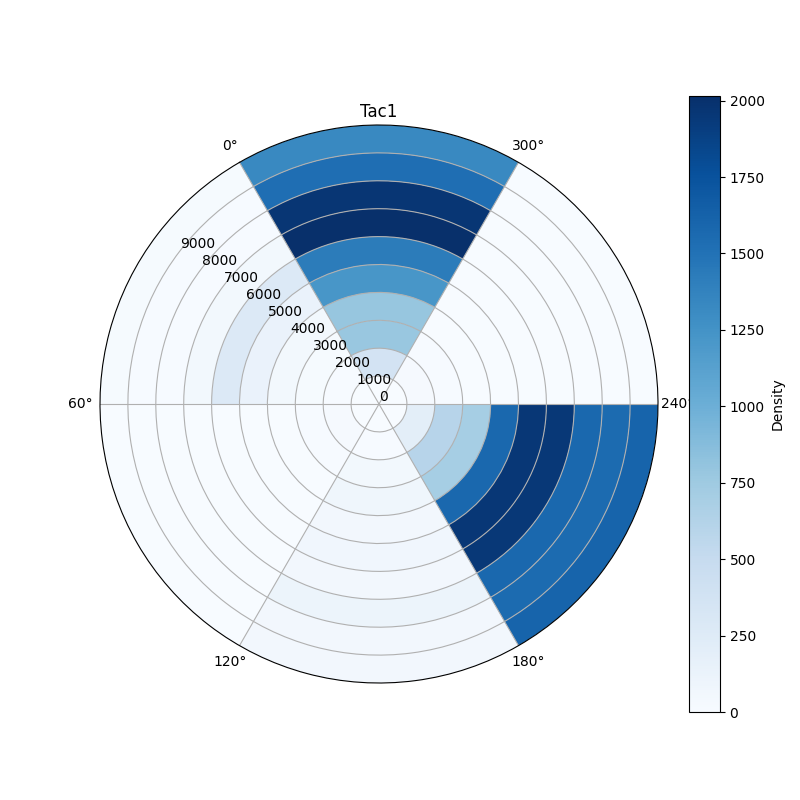

Tac2


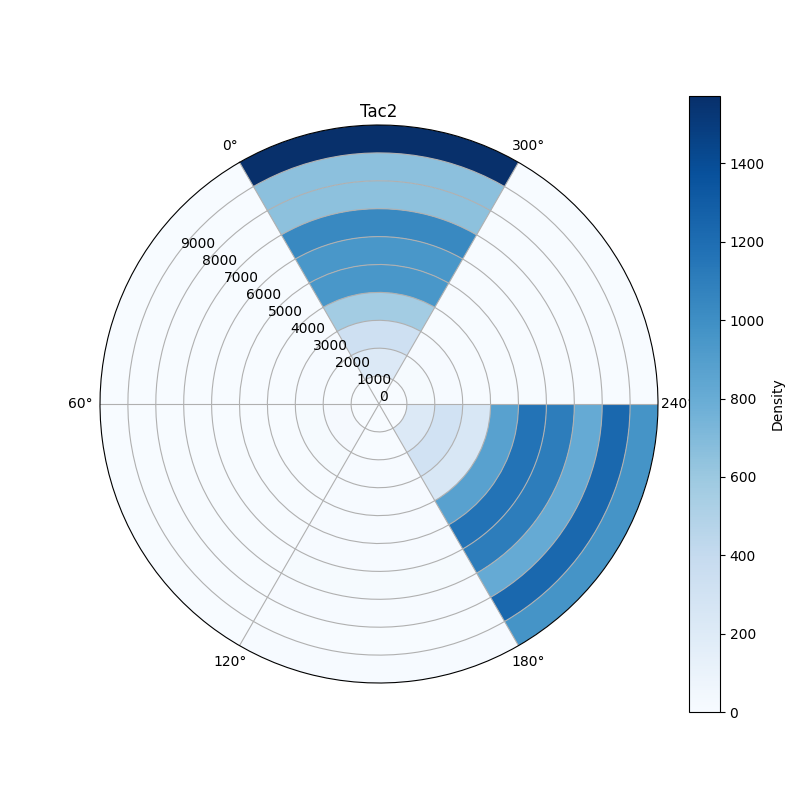

Sst


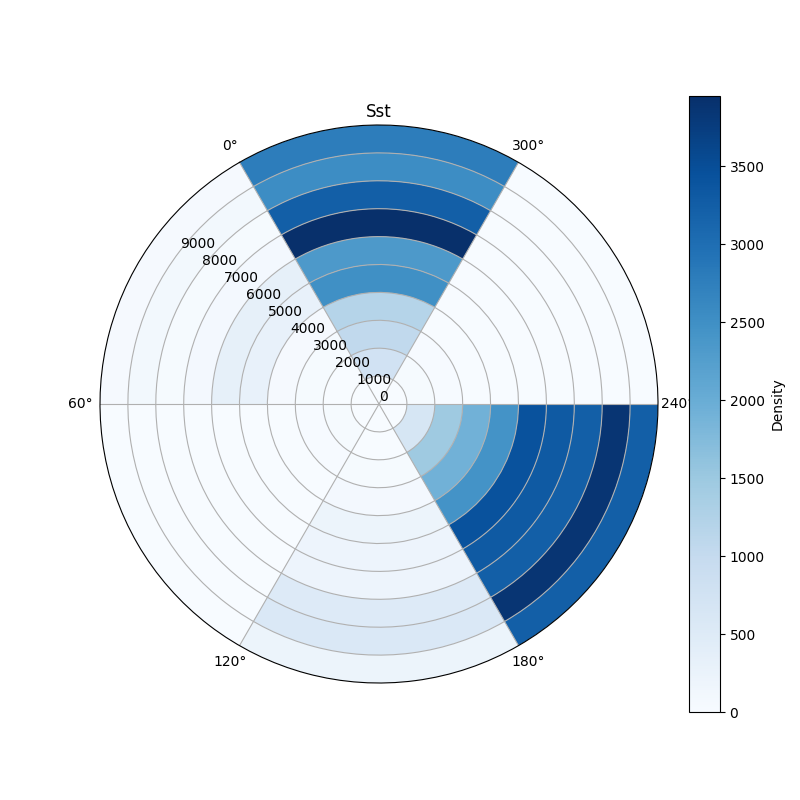

In [5]:
# lets manually rotate the histoggrams by 120 degrees
# lifehack - use the angle_bin_size as multpiplier to angle_offset to have the radial grid visible
plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out2', gene_list = ['Tac1', 'Tac2', 'Sst'], distance_bin_size =1000, angle_bin_size=np.pi/3, distance_max = 10000, angle_offset = 2*np.pi/3, colormap = 'Blues')

2b - Example of plotting gene expression on the same figure

Sst
Ifit2
Adam12
multiple histograms


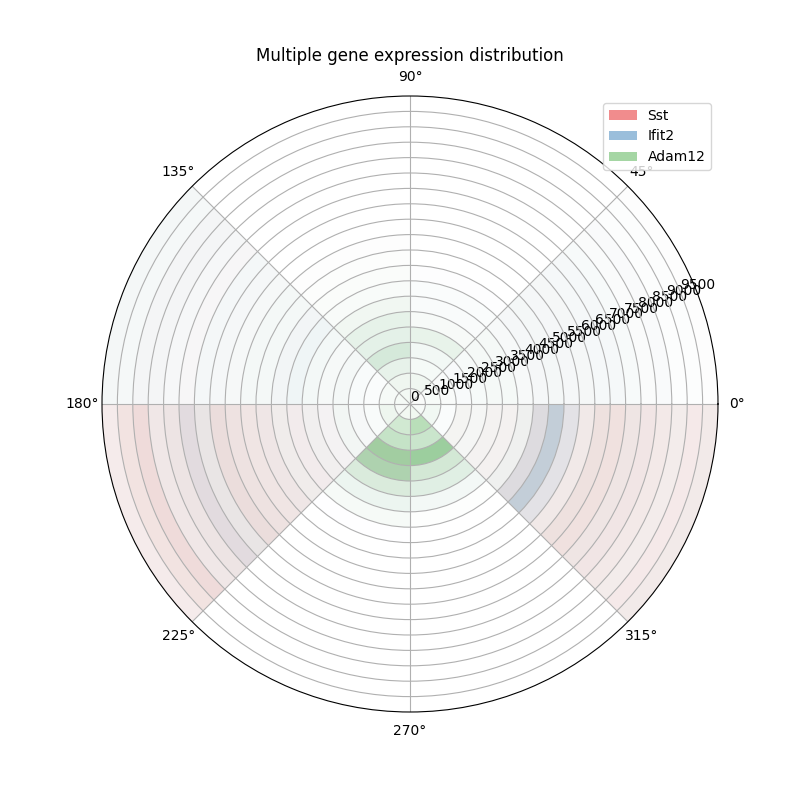

In [6]:
plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out2', gene_list = ['Sst', 'Ifit2', 'Adam12'], distance_bin_size =500,distance_max = 10000, multiple_histograms = True)

Sst
Ifit2
Adam12
multiple histograms


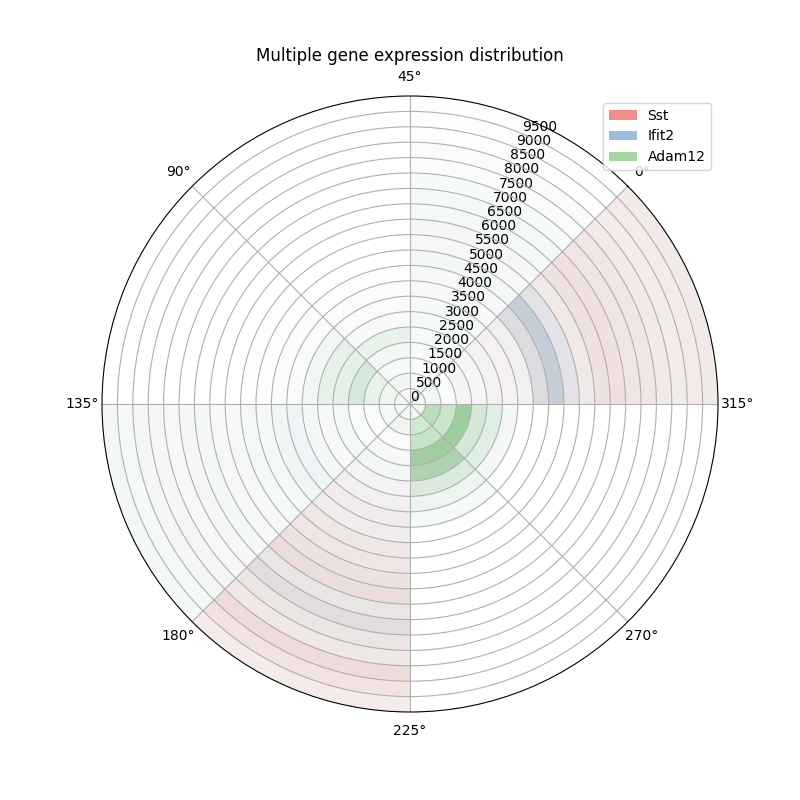

In [7]:
#same but rotated by 45 degrees
plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out2', gene_list = ['Sst', 'Ifit2', 'Adam12'], distance_bin_size =500,distance_max = 10000, multiple_histograms = True, angle_offset = np.pi/4)

2c - Example of plotting genes expression on the same figure grouped together to one distribution


Ifit2
Adam12
Sst


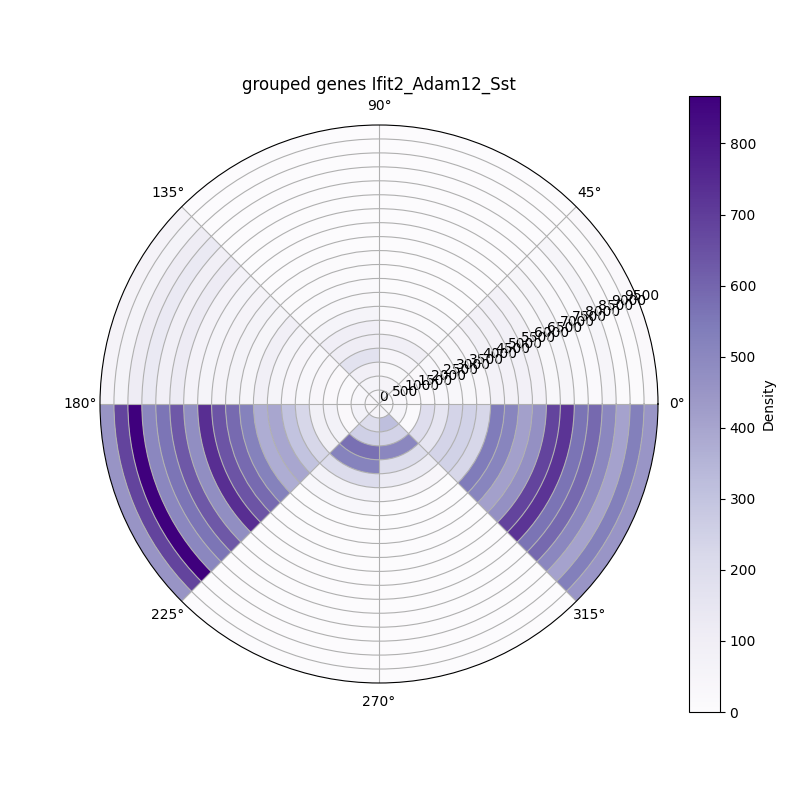

In [8]:
plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out2', gene_list = ['Ifit2', 'Adam12', 'Sst'], distance_bin_size =500,distance_max = 10000, multiple_histograms = True, group_together = True)

3a - Example of plotting cell types (or any other values from any column (s) in adata.obs) on separate figures

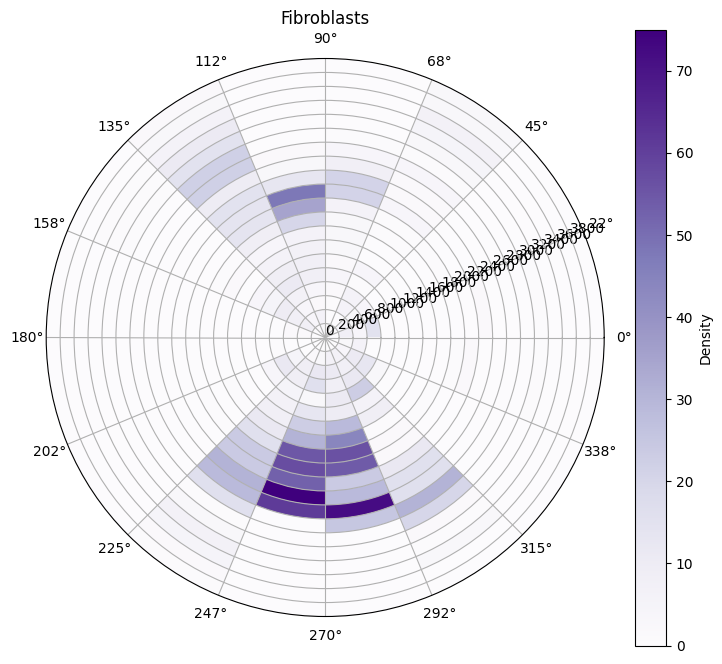

<Figure size 640x480 with 0 Axes>

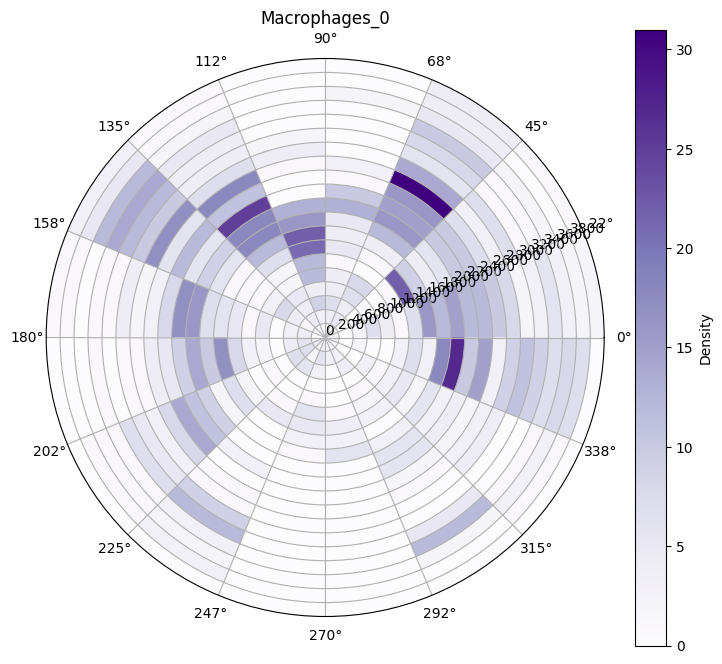

<Figure size 640x480 with 0 Axes>

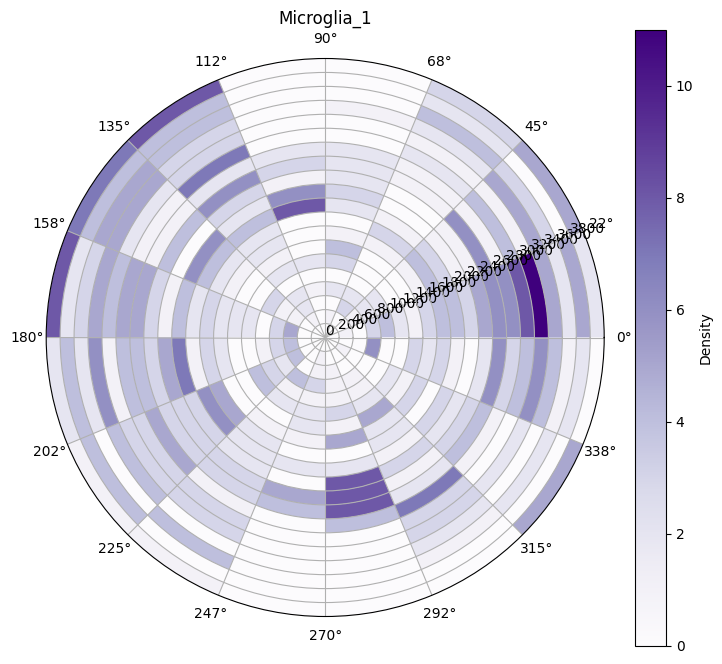

<Figure size 640x480 with 0 Axes>

In [3]:
obs_sets = [['group', ['Fibroblasts', 'Macrophages_0', 'Microglia_1']]]

plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out2', obs_sets = obs_sets, angle_bin_size = np.pi/8, distance_bin_size =200, distance_max = 4000)

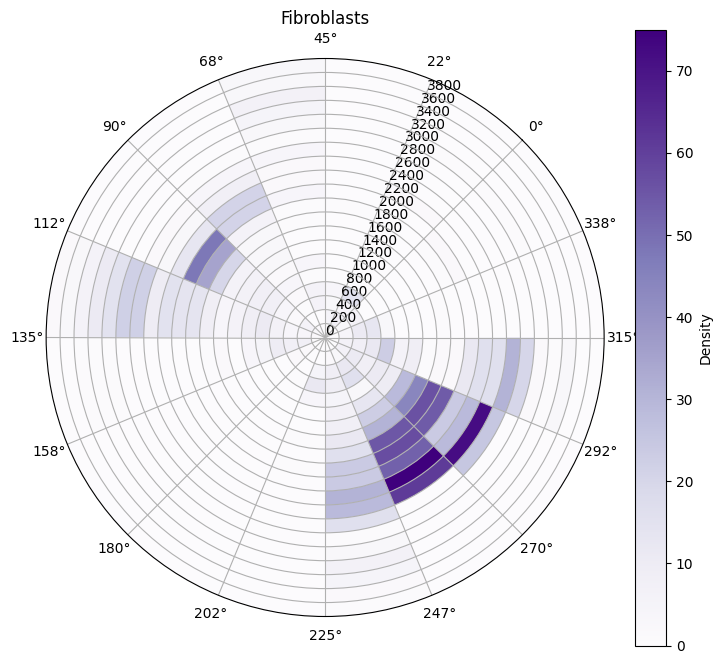

<Figure size 640x480 with 0 Axes>

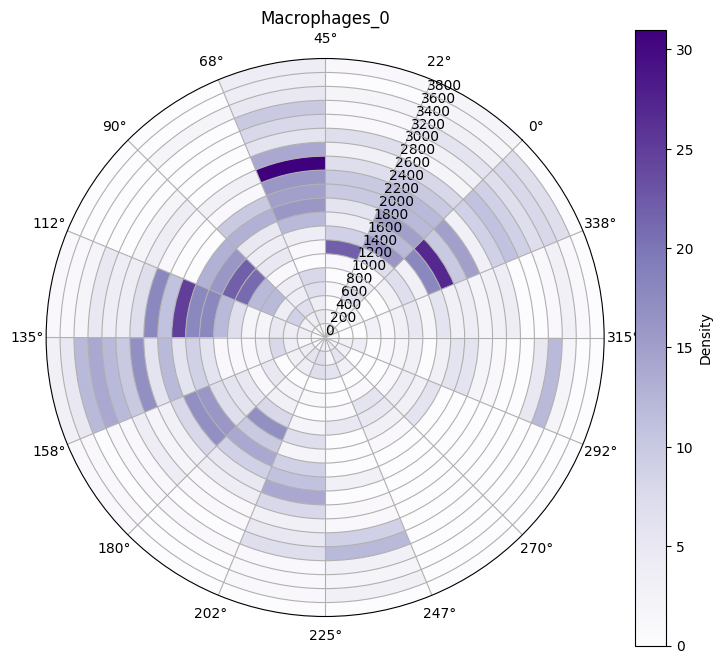

<Figure size 640x480 with 0 Axes>

In [10]:
#same but rotated by 45 degrees
plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out2', obs_sets = obs_sets, angle_bin_size = np.pi/8, distance_bin_size =200, distance_max = 4000, angle_offset = np.pi/4)

3b - Example of plotting cell types on the same figure

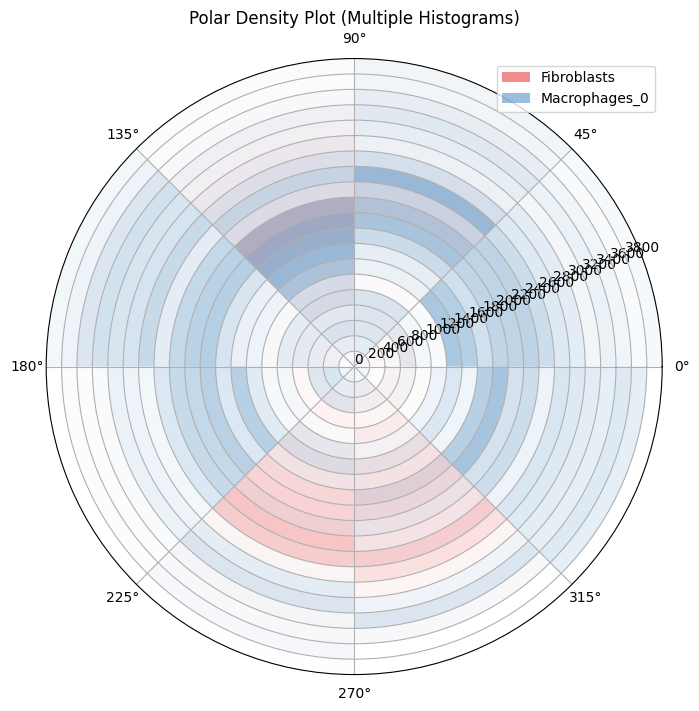

<Figure size 640x480 with 0 Axes>

In [9]:
obs_sets = [['group', ['Fibroblasts', 'Macrophages_0']]]

plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out', obs_sets = obs_sets, angle_bin_size = np.pi/4, distance_bin_size =200, distance_max = 4000, multiple_histograms= True)

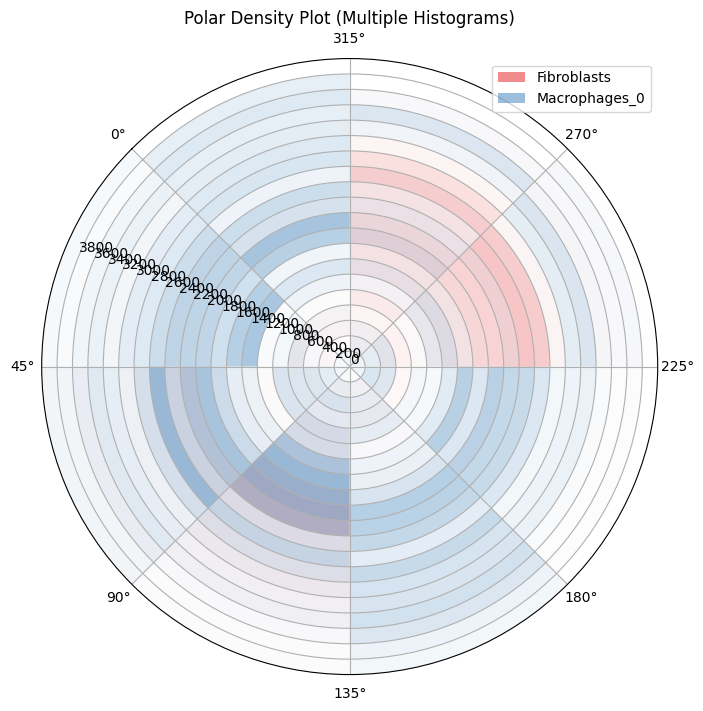

<Figure size 640x480 with 0 Axes>

In [11]:
#same but rotated by 135 degrees
plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out', obs_sets = obs_sets, angle_bin_size = np.pi/4, distance_bin_size =200, distance_max = 4000, multiple_histograms= True, angle_offset = 3*np.pi/4)

3c - Example of plotting cell types on the same figure grouped together

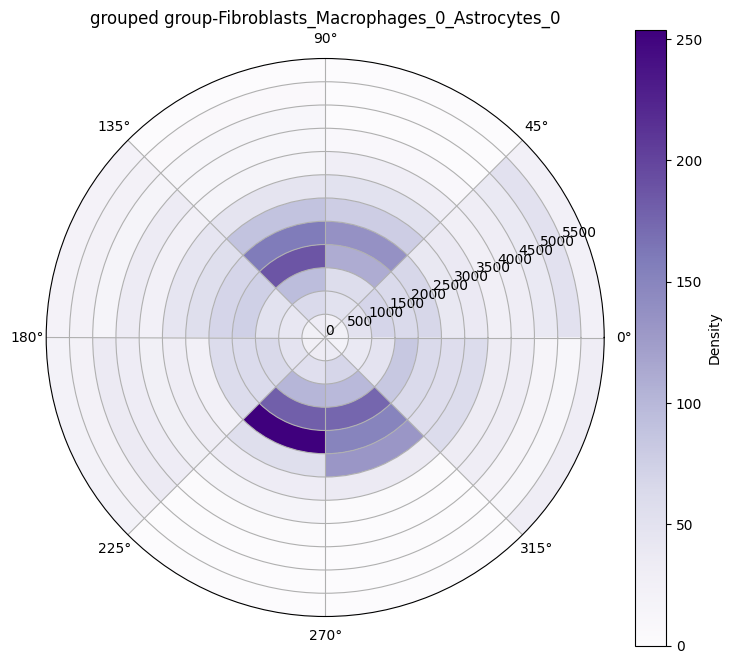

<Figure size 640x480 with 0 Axes>

In [12]:
obs_sets = [['group', ['Fibroblasts', 'Macrophages_0', 'Astrocytes_0']]]

plot_spatial_distribution(adata, [16000, 6800], save_folder = 'out', obs_sets = obs_sets, angle_bin_size = np.pi/4, distance_bin_size =500, distance_max = 6000, multiple_histograms= True, group_together = True)